In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [3]:
df = pd.read_csv('auto-mpg.csv')
df

,MPG,Cylinders,Displacement,Origin,Weight,Acceleration,Model Year,Horsepower
0,18.0,8,307.0,USA,3504.0,12.0,70,130.0
1,15.0,8,350.0,USA,3693.0,11.5,70,165.0
2,18.0,8,318.0,USA,3436.0,11.0,70,150.0
3,16.0,8,304.0,USA,3433.0,12.0,70,150.0
4,17.0,8,302.0,USA,3449.0,10.5,70,140.0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,USA,2790.0,15.6,82,86.0
394,44.0,4,97.0,Europe,2130.0,24.6,82,52.0
395,32.0,4,135.0,USA,2295.0,11.6,82,84.0
396,28.0,4,120.0,USA,2625.0,18.6,82,79.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Origin        398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Horsepower    392 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [5]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Horsepower
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,392.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,104.469388
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,38.491160
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,46.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,75.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,93.500000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,126.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,230.000000


In [7]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Origin          0
Weight          0
Acceleration    0
Model Year      0
Horsepower      6
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Origin          0
Weight          0
Acceleration    0
Model Year      0
Horsepower      0
dtype: int64

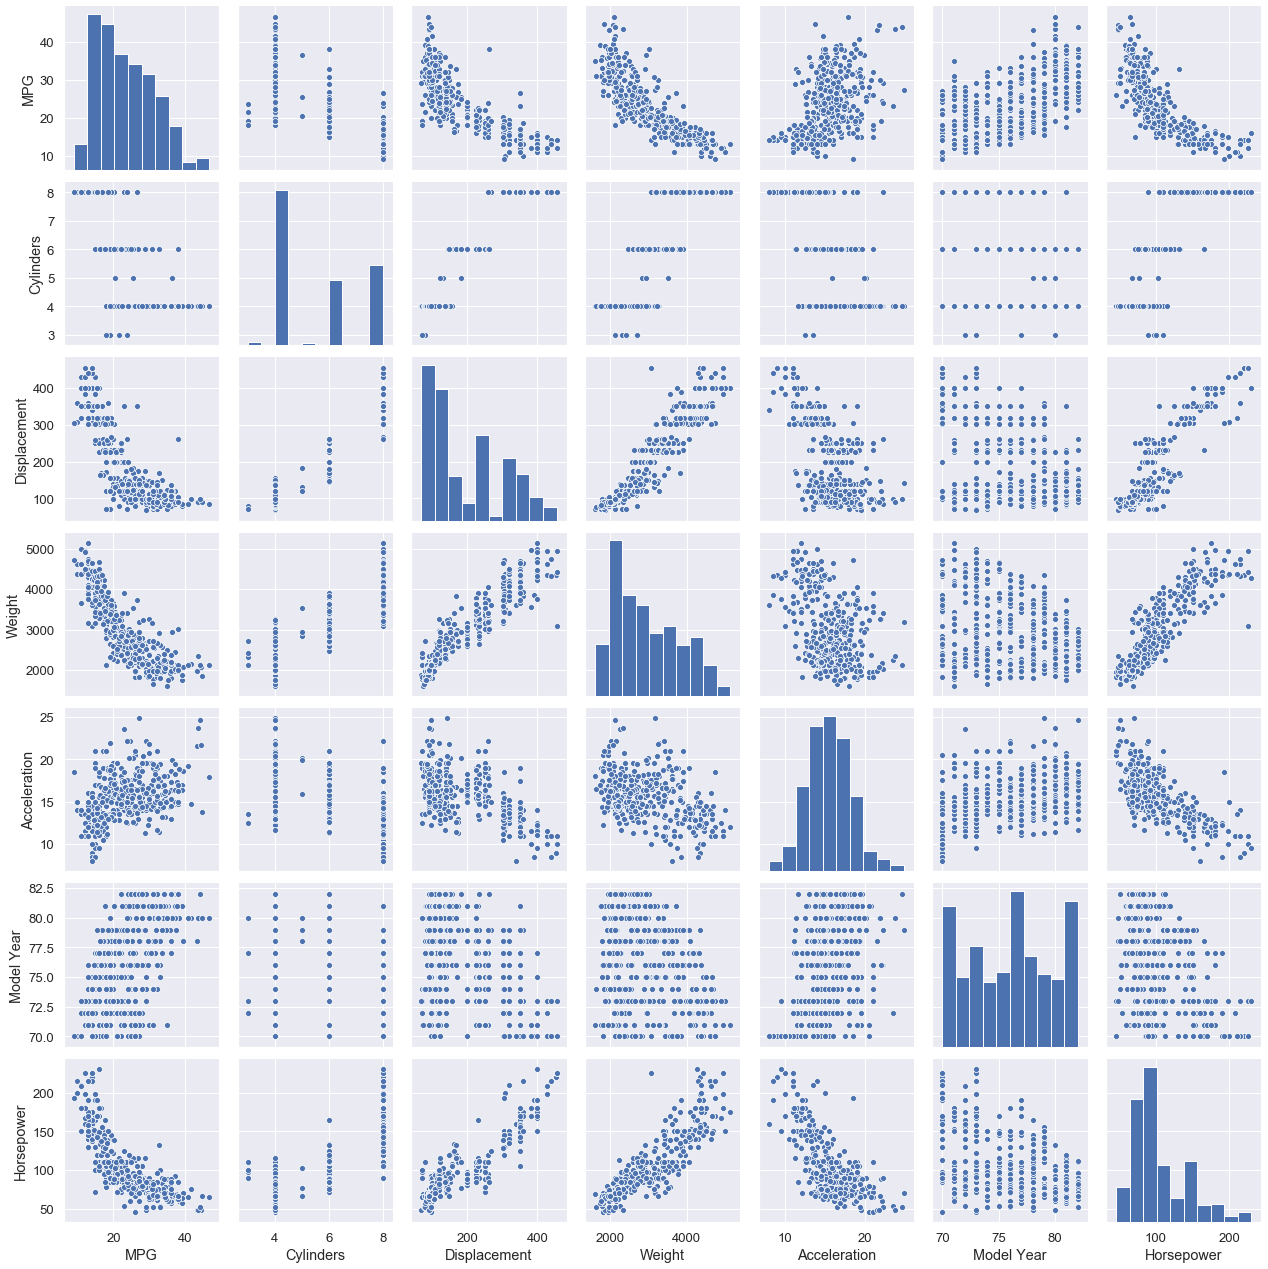

In [10]:
sns.pairplot(df)

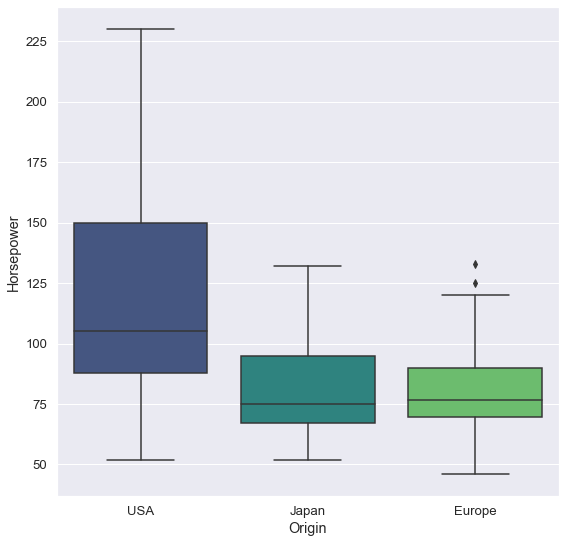

In [11]:
sns.boxplot(x='Origin', y='Horsepower', data=df, palette='viridis')

In [12]:
df = pd.get_dummies(df, columns=['Origin'], drop_first=True)
df

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Horsepower,Origin_Japan,Origin_USA
0,18.0,8,307.0,3504.0,12.0,70,130.0,0,1
1,15.0,8,350.0,3693.0,11.5,70,165.0,0,1
2,18.0,8,318.0,3436.0,11.0,70,150.0,0,1
3,16.0,8,304.0,3433.0,12.0,70,150.0,0,1
4,17.0,8,302.0,3449.0,10.5,70,140.0,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,86.0,0,1
394,44.0,4,97.0,2130.0,24.6,82,52.0,0,0
395,32.0,4,135.0,2295.0,11.6,82,84.0,0,1
396,28.0,4,120.0,2625.0,18.6,82,79.0,0,1


In [25]:
x = df.drop('Horsepower', axis=1)
y = df['Horsepower']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
sc =  StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

### Start with Simple Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [29]:
x_train.shape

(313, 8)

In [16]:
x_train.shape[1]

8

In [62]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(units=1))

In [63]:
model.compile(loss='mean_squared_error', optimizer=Adam())

In [64]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-4)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=600)

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=2000, callbacks=[lrd, mcp, es])

Train on 250 samples, validate on 63 samples
Epoch 1/2000
250/250 [==============================] - 0s 252us/sample - loss: 51.1064 - val_loss: 101.3996
Epoch 2/2000
250/250 [==============================] - 0s 200us/sample - loss: 51.1473 - val_loss: 101.4113
Epoch 3/2000
250/250 [==============================] - 0s 196us/sample - loss: 51.0823 - val_loss: 101.4463
Epoch 4/2000
250/250 [==============================] - 0s 188us/sample - loss: 51.1495 - val_loss: 101.5741
Epoch 5/2000
250/250 [==============================] - 0s 208us/sample - loss: 51.0968 - val_loss: 101.5445
Epoch 6/2000
250/250 [==============================] - 0s 200us/sample - loss: 51.0960 - val_loss: 101.6149
Epoch 7/2000
250/250 [==============================] - 0s 200us/sample - loss: 51.0978 - val_loss: 101.4540
Epoch 8/2000
250/250 [==============================] - 0s 196us/sample - loss: 51.1158 - val_loss: 101.4547
Epoch 9/2000
250/250 [==============================] - 0s 204us/sample - loss: 51.

250/250 [==============================] - 0s 172us/sample - loss: 50.8105 - val_loss: 101.7386
Epoch 76/2000
250/250 [==============================] - 0s 196us/sample - loss: 50.7833 - val_loss: 101.8215
Epoch 77/2000
250/250 [==============================] - 0s 200us/sample - loss: 50.7882 - val_loss: 101.7622
Epoch 78/2000
250/250 [==============================] - 0s 168us/sample - loss: 50.7584 - val_loss: 101.9112
Epoch 79/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.8204 - val_loss: 101.9401
Epoch 80/2000
250/250 [==============================] - 0s 188us/sample - loss: 50.8607 - val_loss: 102.1322
Epoch 81/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.7808 - val_loss: 102.0306
Epoch 82/2000
250/250 [==============================] - 0s 196us/sample - loss: 50.8080 - val_loss: 102.1793
Epoch 83/2000
250/250 [==============================] - 0s 176us/sample - loss: 50.7592 - val_loss: 101.9358
Epoch 84/2000
250/250 [=

Epoch 149/2000
250/250 [==============================] - 0s 192us/sample - loss: 50.5306 - val_loss: 102.1963
Epoch 150/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.4734 - val_loss: 101.9717
Epoch 151/2000
250/250 [==============================] - 0s 168us/sample - loss: 50.4974 - val_loss: 101.7577
Epoch 152/2000
250/250 [==============================] - 0s 200us/sample - loss: 50.4937 - val_loss: 102.0758
Epoch 153/2000
250/250 [==============================] - 0s 188us/sample - loss: 50.4615 - val_loss: 101.7261
Epoch 154/2000
250/250 [==============================] - 0s 204us/sample - loss: 50.4507 - val_loss: 101.7644
Epoch 155/2000
250/250 [==============================] - 0s 204us/sample - loss: 50.4143 - val_loss: 101.8607
Epoch 156/2000
250/250 [==============================] - 0s 192us/sample - loss: 50.4509 - val_loss: 101.9965
Epoch 157/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.5018 - val_loss: 102.0885
E

250/250 [==============================] - 0s 180us/sample - loss: 50.1868 - val_loss: 101.9987
Epoch 222/2000
250/250 [==============================] - 0s 188us/sample - loss: 50.2393 - val_loss: 102.0502
Epoch 223/2000
250/250 [==============================] - 0s 188us/sample - loss: 50.2128 - val_loss: 101.9401
Epoch 224/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.1614 - val_loss: 101.9640
Epoch 225/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.1557 - val_loss: 101.9121
Epoch 226/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.1586 - val_loss: 101.9391
Epoch 227/2000
250/250 [==============================] - 0s 176us/sample - loss: 50.1613 - val_loss: 101.9630
Epoch 228/2000
250/250 [==============================] - 0s 176us/sample - loss: 50.1778 - val_loss: 101.9764
Epoch 229/2000
250/250 [==============================] - 0s 176us/sample - loss: 50.1589 - val_loss: 102.0811
Epoch 230/2000
2

250/250 [==============================] - 0s 188us/sample - loss: 49.9968 - val_loss: 102.3247
Epoch 295/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.9886 - val_loss: 102.1896
Epoch 296/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.9460 - val_loss: 102.0965
Epoch 297/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.9571 - val_loss: 102.3420
Epoch 298/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.9430 - val_loss: 102.2288
Epoch 299/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.0583 - val_loss: 102.3791
Epoch 300/2000
250/250 [==============================] - 0s 184us/sample - loss: 50.0013 - val_loss: 102.2021
Epoch 301/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.9195 - val_loss: 102.2245
Epoch 302/2000
250/250 [==============================] - 0s 200us/sample - loss: 49.9838 - val_loss: 102.4309
Epoch 303/2000
2

Epoch 368/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.7153 - val_loss: 102.3688
Epoch 369/2000
250/250 [==============================] - 0s 184us/sample - loss: 49.7484 - val_loss: 102.4262
Epoch 370/2000
250/250 [==============================] - 0s 176us/sample - loss: 49.7489 - val_loss: 102.3982
Epoch 371/2000
250/250 [==============================] - 0s 184us/sample - loss: 49.7503 - val_loss: 102.2933
Epoch 372/2000
250/250 [==============================] - 0s 168us/sample - loss: 49.7087 - val_loss: 102.3646
Epoch 373/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.7554 - val_loss: 102.3826
Epoch 374/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.7716 - val_loss: 102.4627
Epoch 375/2000
250/250 [==============================] - 0s 192us/sample - loss: 49.7365 - val_loss: 102.3671
Epoch 376/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.7510 - val_loss: 102.3771
E

250/250 [==============================] - 0s 188us/sample - loss: 49.5506 - val_loss: 102.6071
Epoch 441/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.5364 - val_loss: 102.5430
Epoch 442/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.5435 - val_loss: 102.4984
Epoch 443/2000
250/250 [==============================] - 0s 172us/sample - loss: 49.5761 - val_loss: 102.6061
Epoch 444/2000
250/250 [==============================] - 0s 192us/sample - loss: 49.5611 - val_loss: 102.6617
Epoch 445/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.5205 - val_loss: 102.7390
Epoch 446/2000
250/250 [==============================] - 0s 192us/sample - loss: 49.5462 - val_loss: 102.6540
Epoch 447/2000
250/250 [==============================] - 0s 164us/sample - loss: 49.5297 - val_loss: 102.6521
Epoch 448/2000
250/250 [==============================] - 0s 184us/sample - loss: 49.5159 - val_loss: 102.6560
Epoch 449/2000
2

Epoch 514/2000
250/250 [==============================] - 0s 184us/sample - loss: 49.3906 - val_loss: 102.7579
Epoch 515/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.3986 - val_loss: 102.6789
Epoch 516/2000
250/250 [==============================] - 0s 204us/sample - loss: 49.4235 - val_loss: 102.5853
Epoch 517/2000
250/250 [==============================] - 0s 204us/sample - loss: 49.3720 - val_loss: 102.6323
Epoch 518/2000
250/250 [==============================] - ETA: 0s - loss: 34.83 - 0s 188us/sample - loss: 49.4022 - val_loss: 102.8002
Epoch 519/2000
250/250 [==============================] - 0s 176us/sample - loss: 49.3835 - val_loss: 102.7293
Epoch 520/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.4422 - val_loss: 102.5988
Epoch 521/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.3997 - val_loss: 102.7398
Epoch 522/2000
250/250 [==============================] - 0s 180us/sample - loss: 49.379

Epoch 587/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.2565 - val_loss: 102.8262
Epoch 588/2000
250/250 [==============================] - 0s 200us/sample - loss: 49.2457 - val_loss: 103.0016
Epoch 589/2000
250/250 [==============================] - 0s 184us/sample - loss: 49.2325 - val_loss: 102.9713
Epoch 590/2000
250/250 [==============================] - 0s 192us/sample - loss: 49.2316 - val_loss: 102.9004
Epoch 591/2000
250/250 [==============================] - 0s 204us/sample - loss: 49.3012 - val_loss: 102.7371
Epoch 592/2000
250/250 [==============================] - 0s 196us/sample - loss: 49.2207 - val_loss: 102.7199
Epoch 593/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.2448 - val_loss: 102.7610
Epoch 594/2000
250/250 [==============================] - 0s 176us/sample - loss: 49.2457 - val_loss: 102.9018
Epoch 595/2000
250/250 [==============================] - 0s 188us/sample - loss: 49.2275 - val_loss: 102.8043
E

In [47]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 139us/sample - loss: 115.4840


115.48398870154273

In [48]:
y_pred = model.predict(x_test)
y_pred

array([[ 72.609856],
       [ 94.34786 ],
       [ 59.32731 ],
       [ 60.089645],
       [ 92.250565],
       [ 77.388084],
       [182.03831 ],
       [ 76.91357 ],
       [105.74393 ],
       [ 57.9618  ],
       [188.24367 ],
       [122.23133 ],
       [144.48009 ],
       [ 79.33796 ],
       [123.195305],
       [ 82.56172 ],
       [ 98.18213 ],
       [ 77.19781 ],
       [ 87.90419 ],
       [ 80.39503 ],
       [ 89.27801 ],
       [ 40.88116 ],
       [ 67.225845],
       [138.06245 ],
       [ 71.72254 ],
       [ 82.20973 ],
       [ 92.42655 ],
       [114.36961 ],
       [ 52.72455 ],
       [ 83.47904 ],
       [153.82446 ],
       [ 98.97807 ],
       [116.74452 ],
       [ 78.783714],
       [182.8812  ],
       [ 66.7405  ],
       [144.60245 ],
       [ 74.36371 ],
       [159.41621 ],
       [189.12898 ],
       [158.3981  ],
       [ 77.013664],
       [ 67.344826],
       [ 85.7754  ],
       [158.1199  ],
       [199.25835 ],
       [ 98.92518 ],
       [ 76.0

In [49]:
y_pred[10]

array([188.24367], dtype=float32)

In [50]:
y_test.iloc[10]

190.0

In [51]:
r2_score(y_test, y_pred)

0.9252132216693343

In [55]:
history.history.keys()

dict_keys(['loss', 'val_loss', 'lr'])

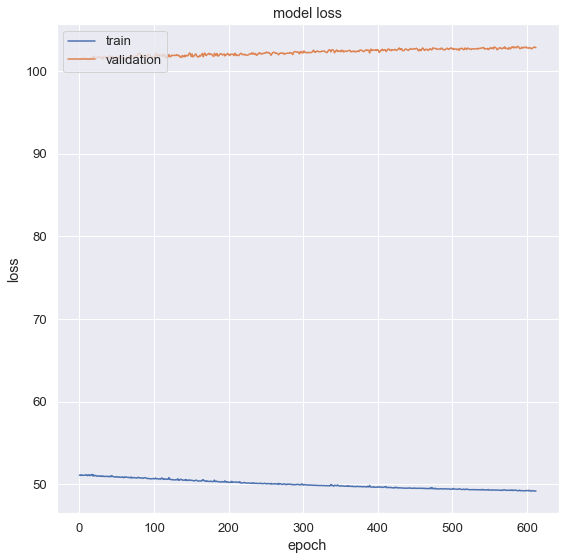

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### Can we do better

In [86]:
from tensorflow.keras.layers import Dropout

In [87]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1))

In [88]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.0002))

In [89]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=1000)

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=2000, callbacks=[lrd, mcp, es])

Train on 250 samples, validate on 63 samples
Epoch 1/2000
250/250 [==============================] - 1s 2ms/sample - loss: 12925.6532 - val_loss: 10640.1936
Epoch 2/2000
250/250 [==============================] - 0s 212us/sample - loss: 12886.7316 - val_loss: 10608.7338
Epoch 3/2000
250/250 [==============================] - 0s 232us/sample - loss: 12849.2408 - val_loss: 10577.7689
Epoch 4/2000
250/250 [==============================] - 0s 228us/sample - loss: 12810.7933 - val_loss: 10546.3464
Epoch 5/2000
250/250 [==============================] - 0s 224us/sample - loss: 12775.7272 - val_loss: 10514.2620
Epoch 6/2000
250/250 [==============================] - 0s 212us/sample - loss: 12739.2209 - val_loss: 10480.8110
Epoch 7/2000
250/250 [==============================] - 0s 222us/sample - loss: 12696.6182 - val_loss: 10445.9897
Epoch 8/2000
250/250 [==============================] - 0s 216us/sample - loss: 12655.5431 - val_loss: 10408.4672
Epoch 9/2000
250/250 [=======================

Epoch 73/2000
250/250 [==============================] - 0s 192us/sample - loss: 1158.6968 - val_loss: 1057.4138
Epoch 74/2000
250/250 [==============================] - 0s 192us/sample - loss: 1086.6231 - val_loss: 1032.7995
Epoch 75/2000
250/250 [==============================] - 0s 196us/sample - loss: 1094.3275 - val_loss: 1010.6984
Epoch 76/2000
250/250 [==============================] - 0s 204us/sample - loss: 1057.9594 - val_loss: 991.7350
Epoch 77/2000
250/250 [==============================] - 0s 184us/sample - loss: 1034.9089 - val_loss: 972.8918
Epoch 78/2000
250/250 [==============================] - 0s 184us/sample - loss: 1016.8744 - val_loss: 955.5217
Epoch 79/2000
250/250 [==============================] - 0s 180us/sample - loss: 989.1123 - val_loss: 939.4809
Epoch 80/2000
250/250 [==============================] - ETA: 0s - loss: 869.196 - 0s 204us/sample - loss: 995.0164 - val_loss: 925.0322
Epoch 81/2000
250/250 [==============================] - 0s 192us/sample - lo

Epoch 146/2000
250/250 [==============================] - 0s 212us/sample - loss: 421.9369 - val_loss: 420.3684
Epoch 147/2000
250/250 [==============================] - 0s 204us/sample - loss: 450.8217 - val_loss: 416.0181
Epoch 148/2000
250/250 [==============================] - 0s 192us/sample - loss: 416.8552 - val_loss: 411.9171
Epoch 149/2000
250/250 [==============================] - 0s 204us/sample - loss: 456.3019 - val_loss: 407.6909
Epoch 150/2000
250/250 [==============================] - 0s 216us/sample - loss: 403.3140 - val_loss: 403.7337
Epoch 151/2000
250/250 [==============================] - 0s 192us/sample - loss: 438.0919 - val_loss: 399.5984
Epoch 152/2000
250/250 [==============================] - 0s 206us/sample - loss: 424.9690 - val_loss: 395.5107
Epoch 153/2000
250/250 [==============================] - 0s 204us/sample - loss: 382.9563 - val_loss: 391.8482
Epoch 154/2000
250/250 [==============================] - 0s 200us/sample - loss: 374.5867 - val_loss: 3

Epoch 219/2000
250/250 [==============================] - 0s 228us/sample - loss: 288.8157 - val_loss: 233.3235
Epoch 220/2000
250/250 [==============================] - 0s 212us/sample - loss: 255.0434 - val_loss: 231.6335
Epoch 221/2000
250/250 [==============================] - 0s 196us/sample - loss: 276.8018 - val_loss: 230.1276
Epoch 222/2000
250/250 [==============================] - 0s 204us/sample - loss: 275.2499 - val_loss: 229.0122
Epoch 223/2000
250/250 [==============================] - 0s 208us/sample - loss: 274.1744 - val_loss: 228.0141
Epoch 224/2000
250/250 [==============================] - 0s 212us/sample - loss: 285.5439 - val_loss: 226.6900
Epoch 225/2000
250/250 [==============================] - 0s 204us/sample - loss: 261.6083 - val_loss: 225.5299
Epoch 226/2000
250/250 [==============================] - 0s 216us/sample - loss: 273.4932 - val_loss: 224.0901
Epoch 227/2000
250/250 [==============================] - 0s 216us/sample - loss: 271.1421 - val_loss: 2

250/250 [==============================] - 0s 200us/sample - loss: 212.5779 - val_loss: 173.2306
Epoch 293/2000
250/250 [==============================] - 0s 196us/sample - loss: 218.9293 - val_loss: 172.6729
Epoch 294/2000
250/250 [==============================] - 0s 196us/sample - loss: 204.4721 - val_loss: 172.2607
Epoch 295/2000
250/250 [==============================] - 0s 204us/sample - loss: 206.4887 - val_loss: 171.8472
Epoch 296/2000
250/250 [==============================] - 0s 192us/sample - loss: 220.6197 - val_loss: 171.6422
Epoch 297/2000
250/250 [==============================] - 0s 188us/sample - loss: 213.9684 - val_loss: 171.0429
Epoch 298/2000
250/250 [==============================] - 0s 220us/sample - loss: 247.6566 - val_loss: 170.8428
Epoch 299/2000
250/250 [==============================] - 0s 208us/sample - loss: 226.0063 - val_loss: 171.0491
Epoch 300/2000
250/250 [==============================] - 0s 220us/sample - loss: 225.3518 - val_loss: 170.7400
Epoch 3

250/250 [==============================] - 0s 196us/sample - loss: 202.2937 - val_loss: 153.2691
Epoch 366/2000
250/250 [==============================] - 0s 200us/sample - loss: 196.0341 - val_loss: 153.6136
Epoch 367/2000
250/250 [==============================] - 0s 200us/sample - loss: 199.8573 - val_loss: 153.0294
Epoch 368/2000
250/250 [==============================] - 0s 200us/sample - loss: 203.3833 - val_loss: 152.9834
Epoch 369/2000
250/250 [==============================] - 0s 192us/sample - loss: 211.6243 - val_loss: 153.0711
Epoch 370/2000
250/250 [==============================] - 0s 172us/sample - loss: 203.7583 - val_loss: 153.2960
Epoch 371/2000
250/250 [==============================] - ETA: 0s - loss: 181.569 - 0s 184us/sample - loss: 194.2936 - val_loss: 152.9144
Epoch 372/2000
250/250 [==============================] - 0s 192us/sample - loss: 197.2204 - val_loss: 152.8898
Epoch 373/2000
250/250 [==============================] - 0s 200us/sample - loss: 182.6952 - 

250/250 [==============================] - 0s 196us/sample - loss: 205.4524 - val_loss: 143.6940
Epoch 439/2000
250/250 [==============================] - 0s 184us/sample - loss: 201.5762 - val_loss: 143.8150
Epoch 440/2000
250/250 [==============================] - 0s 188us/sample - loss: 189.2418 - val_loss: 143.2606
Epoch 441/2000
250/250 [==============================] - 0s 184us/sample - loss: 212.4133 - val_loss: 143.3808
Epoch 442/2000
250/250 [==============================] - 0s 172us/sample - loss: 186.4113 - val_loss: 143.8154
Epoch 443/2000
250/250 [==============================] - 0s 180us/sample - loss: 215.3718 - val_loss: 143.7504
Epoch 444/2000
250/250 [==============================] - 0s 184us/sample - loss: 198.6582 - val_loss: 143.5274
Epoch 445/2000
250/250 [==============================] - 0s 196us/sample - loss: 185.8004 - val_loss: 143.1880
Epoch 446/2000
250/250 [==============================] - 0s 192us/sample - loss: 186.8670 - val_loss: 143.0916
Epoch 4

250/250 [==============================] - 0s 216us/sample - loss: 196.6317 - val_loss: 136.9322
Epoch 512/2000
250/250 [==============================] - 0s 204us/sample - loss: 184.1580 - val_loss: 136.8546
Epoch 513/2000
250/250 [==============================] - 0s 196us/sample - loss: 223.4111 - val_loss: 136.3864
Epoch 514/2000
250/250 [==============================] - 0s 208us/sample - loss: 183.9713 - val_loss: 136.5530
Epoch 515/2000
250/250 [==============================] - 0s 212us/sample - loss: 184.2359 - val_loss: 136.3567
Epoch 516/2000
250/250 [==============================] - 0s 200us/sample - loss: 175.8061 - val_loss: 135.8808
Epoch 517/2000
250/250 [==============================] - 0s 200us/sample - loss: 198.6070 - val_loss: 135.4243
Epoch 518/2000
250/250 [==============================] - 0s 200us/sample - loss: 139.1781 - val_loss: 135.2696
Epoch 519/2000
250/250 [==============================] - 0s 204us/sample - loss: 174.5763 - val_loss: 135.4711
Epoch 5

250/250 [==============================] - 0s 208us/sample - loss: 184.9365 - val_loss: 130.6698
Epoch 585/2000
250/250 [==============================] - 0s 204us/sample - loss: 156.9427 - val_loss: 130.2065
Epoch 586/2000
250/250 [==============================] - 0s 188us/sample - loss: 218.9375 - val_loss: 130.5241
Epoch 587/2000
250/250 [==============================] - 0s 188us/sample - loss: 187.4407 - val_loss: 130.5845
Epoch 588/2000
250/250 [==============================] - 0s 208us/sample - loss: 170.4774 - val_loss: 130.5964
Epoch 589/2000
250/250 [==============================] - 0s 216us/sample - loss: 173.6278 - val_loss: 130.8307
Epoch 590/2000
250/250 [==============================] - 0s 196us/sample - loss: 171.8246 - val_loss: 130.7995
Epoch 591/2000
250/250 [==============================] - 0s 196us/sample - loss: 159.3249 - val_loss: 131.1203
Epoch 592/2000
250/250 [==============================] - 0s 200us/sample - loss: 165.4870 - val_loss: 131.6879
Epoch 5

250/250 [==============================] - 0s 200us/sample - loss: 146.4690 - val_loss: 125.6258
Epoch 658/2000
250/250 [==============================] - 0s 196us/sample - loss: 179.1304 - val_loss: 125.5045
Epoch 659/2000
250/250 [==============================] - 0s 216us/sample - loss: 140.1460 - val_loss: 124.8783
Epoch 660/2000
250/250 [==============================] - 0s 196us/sample - loss: 160.2161 - val_loss: 124.3769
Epoch 661/2000
250/250 [==============================] - 0s 204us/sample - loss: 183.7685 - val_loss: 123.7860
Epoch 662/2000
250/250 [==============================] - 0s 196us/sample - loss: 143.1105 - val_loss: 123.7603
Epoch 663/2000
250/250 [==============================] - 0s 204us/sample - loss: 161.1415 - val_loss: 123.9658
Epoch 664/2000
250/250 [==============================] - 0s 240us/sample - loss: 162.1806 - val_loss: 124.2698
Epoch 665/2000
250/250 [==============================] - 0s 228us/sample - loss: 159.2153 - val_loss: 124.3665
Epoch 6

250/250 [==============================] - 0s 188us/sample - loss: 168.1774 - val_loss: 122.7022
Epoch 731/2000
250/250 [==============================] - 0s 200us/sample - loss: 163.9456 - val_loss: 122.7821
Epoch 732/2000
250/250 [==============================] - 0s 192us/sample - loss: 154.4645 - val_loss: 122.9005
Epoch 733/2000
250/250 [==============================] - 0s 204us/sample - loss: 182.2646 - val_loss: 122.8769
Epoch 734/2000
250/250 [==============================] - 0s 188us/sample - loss: 143.3521 - val_loss: 122.8717
Epoch 735/2000
250/250 [==============================] - 0s 200us/sample - loss: 137.6597 - val_loss: 123.2595
Epoch 736/2000
250/250 [==============================] - 0s 200us/sample - loss: 169.5011 - val_loss: 123.5203
Epoch 737/2000
250/250 [==============================] - 0s 200us/sample - loss: 157.9479 - val_loss: 123.4765
Epoch 738/2000
250/250 [==============================] - 0s 192us/sample - loss: 165.5167 - val_loss: 123.9232
Epoch 7

250/250 [==============================] - 0s 184us/sample - loss: 133.1353 - val_loss: 120.9661
Epoch 804/2000
250/250 [==============================] - 0s 192us/sample - loss: 133.0216 - val_loss: 121.4872
Epoch 805/2000
250/250 [==============================] - 0s 204us/sample - loss: 142.1354 - val_loss: 122.1094
Epoch 806/2000
250/250 [==============================] - 0s 192us/sample - loss: 149.9166 - val_loss: 121.4269
Epoch 807/2000
250/250 [==============================] - 0s 188us/sample - loss: 162.7507 - val_loss: 121.2564
Epoch 808/2000
250/250 [==============================] - 0s 192us/sample - loss: 154.1019 - val_loss: 120.6754
Epoch 809/2000
250/250 [==============================] - 0s 192us/sample - loss: 139.3197 - val_loss: 120.0473
Epoch 810/2000
250/250 [==============================] - 0s 462us/sample - loss: 167.5681 - val_loss: 120.0920
Epoch 811/2000
250/250 [==============================] - 0s 204us/sample - loss: 163.3438 - val_loss: 120.2474
Epoch 8

250/250 [==============================] - 0s 208us/sample - loss: 141.2607 - val_loss: 118.2524
Epoch 877/2000
250/250 [==============================] - 0s 200us/sample - loss: 157.3920 - val_loss: 119.2935
Epoch 878/2000
250/250 [==============================] - 0s 192us/sample - loss: 164.4898 - val_loss: 120.2884
Epoch 879/2000
250/250 [==============================] - 0s 204us/sample - loss: 169.7747 - val_loss: 119.6486
Epoch 880/2000
250/250 [==============================] - 0s 208us/sample - loss: 151.9453 - val_loss: 119.1587
Epoch 881/2000
250/250 [==============================] - 0s 196us/sample - loss: 127.5440 - val_loss: 118.4129
Epoch 882/2000
250/250 [==============================] - 0s 200us/sample - loss: 159.3545 - val_loss: 118.1421
Epoch 883/2000
250/250 [==============================] - 0s 208us/sample - loss: 156.9907 - val_loss: 118.2414
Epoch 884/2000
250/250 [==============================] - 0s 212us/sample - loss: 130.7585 - val_loss: 118.6117
Epoch 8

250/250 [==============================] - 0s 224us/sample - loss: 137.2209 - val_loss: 117.9107
Epoch 950/2000
250/250 [==============================] - 0s 220us/sample - loss: 170.2658 - val_loss: 117.4899
Epoch 951/2000
250/250 [==============================] - 0s 204us/sample - loss: 146.1953 - val_loss: 117.7330
Epoch 952/2000
250/250 [==============================] - 0s 209us/sample - loss: 155.0183 - val_loss: 117.8144
Epoch 953/2000
250/250 [==============================] - 0s 220us/sample - loss: 155.7612 - val_loss: 117.2313
Epoch 954/2000
250/250 [==============================] - 0s 212us/sample - loss: 135.5161 - val_loss: 117.1350
Epoch 955/2000
250/250 [==============================] - 0s 216us/sample - loss: 148.8508 - val_loss: 116.9864
Epoch 956/2000
250/250 [==============================] - 0s 213us/sample - loss: 146.5391 - val_loss: 117.6054
Epoch 957/2000
250/250 [==============================] - 0s 216us/sample - loss: 152.6322 - val_loss: 117.8196
Epoch 9

250/250 [==============================] - 0s 224us/sample - loss: 154.8115 - val_loss: 115.6627
Epoch 1023/2000
250/250 [==============================] - 0s 228us/sample - loss: 136.9757 - val_loss: 115.4710
Epoch 1024/2000
250/250 [==============================] - 0s 204us/sample - loss: 148.1124 - val_loss: 115.0706
Epoch 1025/2000
250/250 [==============================] - 0s 220us/sample - loss: 109.5912 - val_loss: 115.4459
Epoch 1026/2000
250/250 [==============================] - 0s 224us/sample - loss: 137.2176 - val_loss: 115.5037
Epoch 1027/2000
250/250 [==============================] - 0s 228us/sample - loss: 128.0481 - val_loss: 115.4153
Epoch 1028/2000
250/250 [==============================] - 0s 220us/sample - loss: 115.1863 - val_loss: 115.6543
Epoch 1029/2000
250/250 [==============================] - 0s 220us/sample - loss: 140.1219 - val_loss: 116.1528
Epoch 1030/2000
250/250 [==============================] - 0s 216us/sample - loss: 137.9105 - val_loss: 116.3585

250/250 [==============================] - 0s 204us/sample - loss: 142.3411 - val_loss: 113.8174
Epoch 1095/2000
250/250 [==============================] - 0s 216us/sample - loss: 141.8194 - val_loss: 113.6474
Epoch 1096/2000
250/250 [==============================] - 0s 204us/sample - loss: 134.5113 - val_loss: 113.7773
Epoch 1097/2000
250/250 [==============================] - 0s 208us/sample - loss: 153.8157 - val_loss: 114.5563
Epoch 1098/2000
250/250 [==============================] - 0s 204us/sample - loss: 141.7373 - val_loss: 114.6135
Epoch 1099/2000
250/250 [==============================] - 0s 220us/sample - loss: 158.4773 - val_loss: 113.9612
Epoch 1100/2000
250/250 [==============================] - 0s 210us/sample - loss: 145.4116 - val_loss: 113.3486
Epoch 1101/2000
250/250 [==============================] - 0s 196us/sample - loss: 130.0537 - val_loss: 113.0812
Epoch 1102/2000
250/250 [==============================] - 0s 216us/sample - loss: 138.1921 - val_loss: 113.1747

250/250 [==============================] - 0s 212us/sample - loss: 141.2525 - val_loss: 110.9369
Epoch 1167/2000
250/250 [==============================] - 0s 196us/sample - loss: 146.6327 - val_loss: 110.9851
Epoch 1168/2000
250/250 [==============================] - 0s 220us/sample - loss: 157.2261 - val_loss: 111.0295
Epoch 1169/2000
250/250 [==============================] - 0s 204us/sample - loss: 148.5728 - val_loss: 111.4114
Epoch 1170/2000
250/250 [==============================] - 0s 192us/sample - loss: 143.8207 - val_loss: 111.8173
Epoch 1171/2000
250/250 [==============================] - 0s 196us/sample - loss: 128.4664 - val_loss: 111.7337
Epoch 1172/2000
250/250 [==============================] - 0s 192us/sample - loss: 130.5912 - val_loss: 111.2861
Epoch 1173/2000
250/250 [==============================] - 0s 196us/sample - loss: 138.1407 - val_loss: 111.2156
Epoch 1174/2000
250/250 [==============================] - 0s 204us/sample - loss: 168.6937 - val_loss: 111.0734

250/250 [==============================] - 0s 200us/sample - loss: 117.1422 - val_loss: 109.8389
Epoch 1239/2000
250/250 [==============================] - 0s 212us/sample - loss: 140.0753 - val_loss: 110.2750
Epoch 1240/2000
250/250 [==============================] - 0s 196us/sample - loss: 121.1837 - val_loss: 110.6338
Epoch 1241/2000
250/250 [==============================] - 0s 208us/sample - loss: 124.0782 - val_loss: 110.8486
Epoch 1242/2000
250/250 [==============================] - 0s 200us/sample - loss: 135.7723 - val_loss: 111.1905
Epoch 1243/2000
250/250 [==============================] - 0s 196us/sample - loss: 154.9739 - val_loss: 110.5339
Epoch 1244/2000
250/250 [==============================] - 0s 200us/sample - loss: 148.2849 - val_loss: 109.8193
Epoch 1245/2000
250/250 [==============================] - 0s 216us/sample - loss: 129.3558 - val_loss: 110.0923
Epoch 1246/2000
250/250 [==============================] - 0s 196us/sample - loss: 123.4934 - val_loss: 110.8822

250/250 [==============================] - 0s 200us/sample - loss: 137.3093 - val_loss: 108.8724
Epoch 1311/2000
250/250 [==============================] - 0s 212us/sample - loss: 149.9042 - val_loss: 108.6149
Epoch 1312/2000
250/250 [==============================] - 0s 204us/sample - loss: 149.3994 - val_loss: 108.3656
Epoch 1313/2000
250/250 [==============================] - 0s 192us/sample - loss: 131.1192 - val_loss: 108.5676
Epoch 1314/2000
250/250 [==============================] - 0s 200us/sample - loss: 158.3543 - val_loss: 109.1215
Epoch 1315/2000
250/250 [==============================] - 0s 204us/sample - loss: 141.9372 - val_loss: 109.7720
Epoch 1316/2000
250/250 [==============================] - 0s 208us/sample - loss: 144.0094 - val_loss: 109.5049
Epoch 1317/2000
250/250 [==============================] - 0s 200us/sample - loss: 125.0299 - val_loss: 108.8754
Epoch 1318/2000
250/250 [==============================] - 0s 204us/sample - loss: 167.5906 - val_loss: 108.9063

250/250 [==============================] - 0s 234us/sample - loss: 139.5952 - val_loss: 107.9598
Epoch 1383/2000
250/250 [==============================] - 0s 208us/sample - loss: 125.3355 - val_loss: 108.0960
Epoch 1384/2000
250/250 [==============================] - 0s 228us/sample - loss: 112.7153 - val_loss: 108.0658
Epoch 1385/2000
250/250 [==============================] - 0s 232us/sample - loss: 135.0557 - val_loss: 107.9932
Epoch 1386/2000
250/250 [==============================] - 0s 228us/sample - loss: 147.1887 - val_loss: 107.8717
Epoch 1387/2000
250/250 [==============================] - 0s 232us/sample - loss: 121.9217 - val_loss: 107.4641
Epoch 1388/2000
250/250 [==============================] - 0s 220us/sample - loss: 156.9038 - val_loss: 106.8823
Epoch 1389/2000
250/250 [==============================] - 0s 232us/sample - loss: 136.9897 - val_loss: 106.3644
Epoch 1390/2000
250/250 [==============================] - 0s 232us/sample - loss: 127.9305 - val_loss: 106.3369

250/250 [==============================] - 0s 212us/sample - loss: 136.8532 - val_loss: 104.4496
Epoch 1455/2000
250/250 [==============================] - 0s 212us/sample - loss: 128.0394 - val_loss: 105.1503
Epoch 1456/2000
250/250 [==============================] - 0s 200us/sample - loss: 126.1131 - val_loss: 105.0176
Epoch 1457/2000
250/250 [==============================] - 0s 200us/sample - loss: 142.1465 - val_loss: 104.9052
Epoch 1458/2000
250/250 [==============================] - 0s 208us/sample - loss: 125.8892 - val_loss: 104.7331
Epoch 1459/2000
250/250 [==============================] - 0s 200us/sample - loss: 143.6695 - val_loss: 105.2618
Epoch 1460/2000
250/250 [==============================] - 0s 195us/sample - loss: 123.9656 - val_loss: 104.7910
Epoch 1461/2000
250/250 [==============================] - 0s 200us/sample - loss: 133.3610 - val_loss: 104.6689
Epoch 1462/2000
250/250 [==============================] - 0s 200us/sample - loss: 137.1659 - val_loss: 104.6647

250/250 [==============================] - 0s 188us/sample - loss: 121.3969 - val_loss: 101.6917
Epoch 1527/2000
250/250 [==============================] - 0s 204us/sample - loss: 141.1360 - val_loss: 102.2874
Epoch 1528/2000
250/250 [==============================] - 0s 208us/sample - loss: 119.7550 - val_loss: 102.4202
Epoch 1529/2000
250/250 [==============================] - 0s 200us/sample - loss: 121.0437 - val_loss: 102.0355
Epoch 1530/2000
250/250 [==============================] - 0s 220us/sample - loss: 111.0968 - val_loss: 101.8794
Epoch 1531/2000
250/250 [==============================] - 0s 212us/sample - loss: 123.4404 - val_loss: 101.9249
Epoch 1532/2000
250/250 [==============================] - 0s 196us/sample - loss: 122.9021 - val_loss: 101.8519
Epoch 1533/2000
250/250 [==============================] - 0s 204us/sample - loss: 138.5757 - val_loss: 101.6803
Epoch 1534/2000
250/250 [==============================] - 0s 197us/sample - loss: 136.1256 - val_loss: 101.6544

250/250 [==============================] - 0s 212us/sample - loss: 118.2384 - val_loss: 104.8187
Epoch 1599/2000
250/250 [==============================] - 0s 232us/sample - loss: 136.1978 - val_loss: 104.7147
Epoch 1600/2000
250/250 [==============================] - 0s 212us/sample - loss: 133.4036 - val_loss: 104.1433
Epoch 1601/2000
250/250 [==============================] - 0s 208us/sample - loss: 113.0239 - val_loss: 103.8480
Epoch 1602/2000
250/250 [==============================] - 0s 196us/sample - loss: 117.4492 - val_loss: 103.4956
Epoch 1603/2000
250/250 [==============================] - 0s 196us/sample - loss: 140.2432 - val_loss: 103.2551
Epoch 1604/2000
250/250 [==============================] - 0s 204us/sample - loss: 142.8175 - val_loss: 103.1072
Epoch 1605/2000
250/250 [==============================] - 0s 188us/sample - loss: 125.6414 - val_loss: 103.2681
Epoch 1606/2000
250/250 [==============================] - 0s 200us/sample - loss: 145.7584 - val_loss: 102.9279

250/250 [==============================] - 0s 232us/sample - loss: 128.9853 - val_loss: 101.5071
Epoch 1671/2000
250/250 [==============================] - 0s 220us/sample - loss: 108.5164 - val_loss: 100.9641
Epoch 1672/2000
250/250 [==============================] - 0s 220us/sample - loss: 143.1769 - val_loss: 101.4933
Epoch 1673/2000
250/250 [==============================] - 0s 224us/sample - loss: 133.6622 - val_loss: 101.4817
Epoch 1674/2000
250/250 [==============================] - 0s 226us/sample - loss: 137.0572 - val_loss: 101.5091
Epoch 1675/2000
250/250 [==============================] - 0s 216us/sample - loss: 131.9508 - val_loss: 101.4028
Epoch 1676/2000
250/250 [==============================] - 0s 213us/sample - loss: 112.6439 - val_loss: 100.6654
Epoch 1677/2000
250/250 [==============================] - 0s 208us/sample - loss: 126.6833 - val_loss: 100.5695
Epoch 1678/2000
250/250 [==============================] - 0s 211us/sample - loss: 124.8341 - val_loss: 100.9331

Epoch 1743/2000
250/250 [==============================] - 0s 200us/sample - loss: 125.6474 - val_loss: 100.5017
Epoch 1744/2000
250/250 [==============================] - 0s 196us/sample - loss: 113.7000 - val_loss: 100.3205
Epoch 1745/2000
250/250 [==============================] - 0s 192us/sample - loss: 132.3404 - val_loss: 100.6586
Epoch 1746/2000
250/250 [==============================] - 0s 204us/sample - loss: 139.8665 - val_loss: 101.0451
Epoch 1747/2000
250/250 [==============================] - 0s 188us/sample - loss: 119.4955 - val_loss: 100.2935
Epoch 1748/2000
250/250 [==============================] - 0s 192us/sample - loss: 130.5198 - val_loss: 100.2681
Epoch 1749/2000
250/250 [==============================] - 0s 192us/sample - loss: 116.6811 - val_loss: 100.3873
Epoch 1750/2000
250/250 [==============================] - 0s 216us/sample - loss: 134.6333 - val_loss: 100.9428
Epoch 1751/2000
250/250 [==============================] - 0s 200us/sample - loss: 119.4914 - va

250/250 [==============================] - 0s 200us/sample - loss: 119.2559 - val_loss: 100.4076
Epoch 1816/2000
250/250 [==============================] - 0s 212us/sample - loss: 109.7584 - val_loss: 100.0123
Epoch 1817/2000
250/250 [==============================] - 0s 224us/sample - loss: 126.9920 - val_loss: 99.6698
Epoch 1818/2000
250/250 [==============================] - 0s 212us/sample - loss: 124.6676 - val_loss: 99.6153
Epoch 1819/2000
250/250 [==============================] - 0s 212us/sample - loss: 100.4126 - val_loss: 99.5376
Epoch 1820/2000
250/250 [==============================] - 0s 192us/sample - loss: 119.2549 - val_loss: 99.6114
Epoch 1821/2000
250/250 [==============================] - 0s 208us/sample - loss: 125.3638 - val_loss: 100.0910
Epoch 1822/2000
250/250 [==============================] - 0s 208us/sample - loss: 133.0489 - val_loss: 100.5081
Epoch 1823/2000
250/250 [==============================] - 0s 224us/sample - loss: 111.8859 - val_loss: 100.4444
Epo

Epoch 1888/2000
250/250 [==============================] - 0s 220us/sample - loss: 103.9650 - val_loss: 98.9520
Epoch 1889/2000
250/250 [==============================] - 0s 216us/sample - loss: 123.1067 - val_loss: 99.1640
Epoch 1890/2000
250/250 [==============================] - 0s 208us/sample - loss: 121.3657 - val_loss: 99.9014
Epoch 1891/2000
250/250 [==============================] - 0s 200us/sample - loss: 131.9644 - val_loss: 99.6674
Epoch 1892/2000
250/250 [==============================] - 0s 204us/sample - loss: 133.0578 - val_loss: 100.2597
Epoch 1893/2000
250/250 [==============================] - 0s 200us/sample - loss: 113.4124 - val_loss: 99.8129
Epoch 1894/2000
250/250 [==============================] - 0s 196us/sample - loss: 102.6625 - val_loss: 99.9217
Epoch 1895/2000
250/250 [==============================] - 0s 208us/sample - loss: 118.5410 - val_loss: 99.3315
Epoch 1896/2000
250/250 [==============================] - 0s 216us/sample - loss: 120.9607 - val_loss:

Epoch 1961/2000
250/250 [==============================] - 0s 200us/sample - loss: 116.4539 - val_loss: 98.1488
Epoch 1962/2000
250/250 [==============================] - 0s 216us/sample - loss: 106.2166 - val_loss: 98.0722
Epoch 1963/2000
250/250 [==============================] - 0s 196us/sample - loss: 105.4915 - val_loss: 98.3049
Epoch 1964/2000
250/250 [==============================] - 0s 200us/sample - loss: 118.7008 - val_loss: 98.6680
Epoch 1965/2000
250/250 [==============================] - 0s 192us/sample - loss: 120.2473 - val_loss: 98.2456
Epoch 1966/2000
250/250 [==============================] - 0s 200us/sample - loss: 131.6498 - val_loss: 98.7384
Epoch 1967/2000
250/250 [==============================] - 0s 200us/sample - loss: 115.4869 - val_loss: 99.0885
Epoch 1968/2000
250/250 [==============================] - 0s 200us/sample - loss: 124.5893 - val_loss: 99.5645
Epoch 1969/2000
250/250 [==============================] - 0s 208us/sample - loss: 110.4479 - val_loss: 

In [92]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 114us/sample - loss: 113.9404


113.940373094776

In [93]:
y_pred = model.predict(x_test)
y_pred

array([[ 66.34089 ],
       [ 96.8808  ],
       [ 59.989365],
       [ 69.28417 ],
       [ 92.78093 ],
       [ 75.05631 ],
       [184.8303  ],
       [ 73.21541 ],
       [101.467575],
       [ 58.01509 ],
       [188.5332  ],
       [112.184006],
       [149.18474 ],
       [ 76.64208 ],
       [122.20912 ],
       [ 80.39588 ],
       [ 92.26811 ],
       [ 75.0348  ],
       [ 89.17949 ],
       [ 73.25591 ],
       [ 91.09105 ],
       [ 51.456253],
       [ 67.51386 ],
       [140.50105 ],
       [ 76.1884  ],
       [ 80.09324 ],
       [ 79.68439 ],
       [113.63967 ],
       [ 53.678566],
       [ 74.201164],
       [153.0164  ],
       [ 97.9865  ],
       [121.680374],
       [ 77.6565  ],
       [178.18965 ],
       [ 66.77057 ],
       [155.50975 ],
       [ 78.535835],
       [156.01358 ],
       [184.53654 ],
       [154.55357 ],
       [ 79.76549 ],
       [ 68.8973  ],
       [ 85.71374 ],
       [162.63039 ],
       [197.90459 ],
       [104.39249 ],
       [ 68.2

In [94]:
y_pred[1]

array([96.8808], dtype=float32)

In [95]:
y_test.iloc[1]

115.0

In [96]:
r2_score(y_test, y_pred)

0.9262128594413597

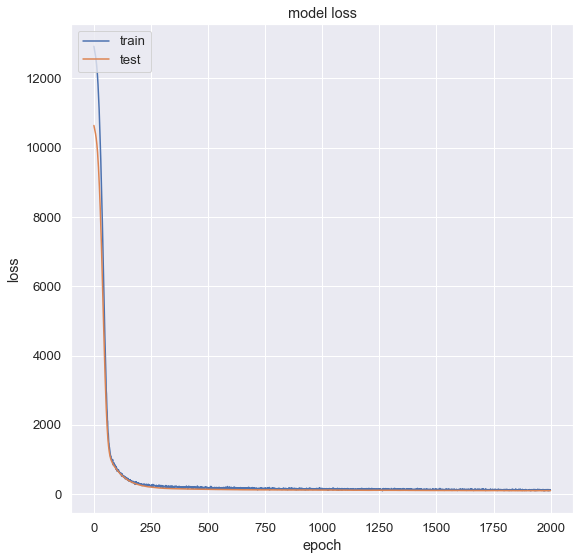

In [97]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Save model

In [98]:
model.save('model.h5')

In [108]:
import joblib

joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [109]:
from tensorflow.keras.models import load_model

In [110]:
model = load_model('model.h5')
sc = joblib.load('scaler.pkl')

# Great Work!